# Описание алгоритма

Основная идея алгоритма заключается в переносе координат распознанных предметов. Для начала я нахожу координаты контуров всех объектов на изображении. Затем разделяю их на фигуру и предметы (фигурой считается объект с наименьшей левой координатой контура). Затем координаты контура попиксельно переносятся в фигуру до тех пор, пока все координаты контура фигуры не будут находиться в фигуре. 

Результатом работы алгоритма является набор изображений: для каждого распознанного предмета строится своя картинка, на которой выделен контур изображения, контур фигуры и контур предмета в фигуре, если фигуру можно поместить в предмет.

# Реализация

Загружаем изображение

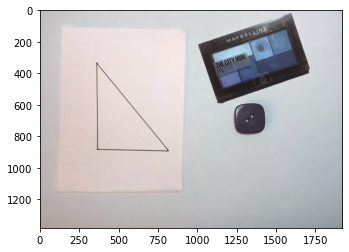

In [5]:
image_name = 'images\ds2.png'
image = cv2.imread(image_name)
plt.imshow(image)
plt.show()

Находим контуры объектов и разделяем их на предметы и фигуры

In [ ]:
objects_contours = get_objects_contours(image)
figure, objects = classify_objects(objects_contours)

Запускаем алгоритм для каждого объекта

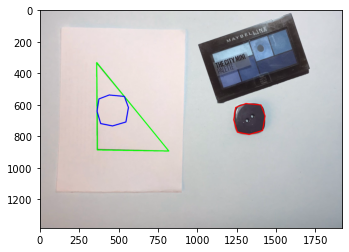

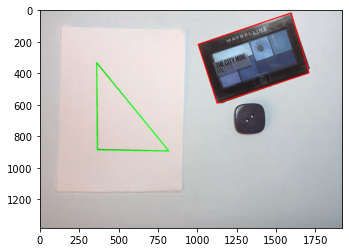

In [4]:
for j in range(len(objects)):
    image_ = image.copy()
    
    draw_contour(image_, objects[j], (255, 0, 0))
    draw_contour(image_, figure, (0, 255, 0))

    check, coordinates = check_location(figure, objects[j].copy())

    if check:
        draw_contour(image_, coordinates, (0, 0, 255))

    plt.imshow(image_)
    plt.show()